In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sweetviz as sv

In [4]:
df= pd.read_csv("violations.csv")

In [5]:
df.head(5)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,4714702166,KGK6659,NY,PAS,11/12/2020,36,4DSD,BMW,V,0,...,GY,NaN,2007,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
1,8793684599,L5232HY,TN,PAS,09/14/2020,21,TRAC,INTER,T,60790,...,WHITE,NaN,0,NaN,0,W,NaN,NaN,NaN,NaN
2,8864757053,BPMN76,FL,PAS,11/25/2020,20,SUBN,NISSA,T,36030,...,BLACK,NaN,0,NaN,0,49,20A-No Parking (Non-COM),NaN,NaN,NaN
3,8778326047,57387MJ,NY,COM,08/20/2020,38,VAN,NaN,T,34430,...,WH,NaN,2016,NaN,0,01,NaN,NaN,NaN,NaN
4,4706640702,M81KFJ,NJ,PAS,09/09/2020,36,UT,TOYOT,V,0,...,NaN,NaN,2002,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN


In [6]:
df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [7]:
df.shape

(50000, 43)

In [8]:
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=False)

C:\Users\evans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\evans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

C:\Users\evans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\evans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\evans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
 

Report analyze.html was generated.



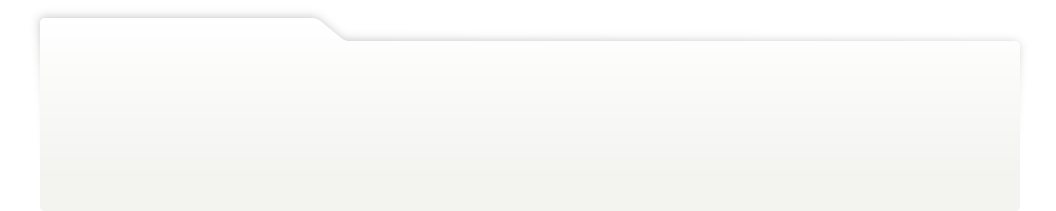
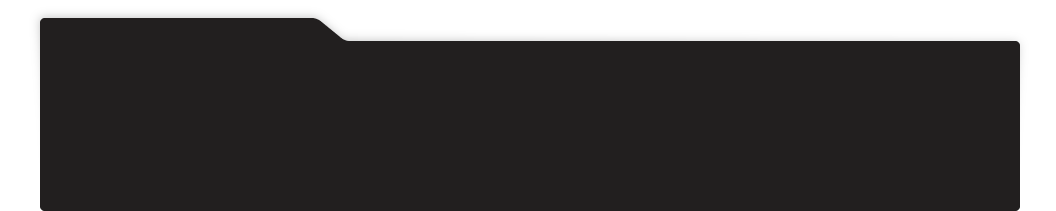
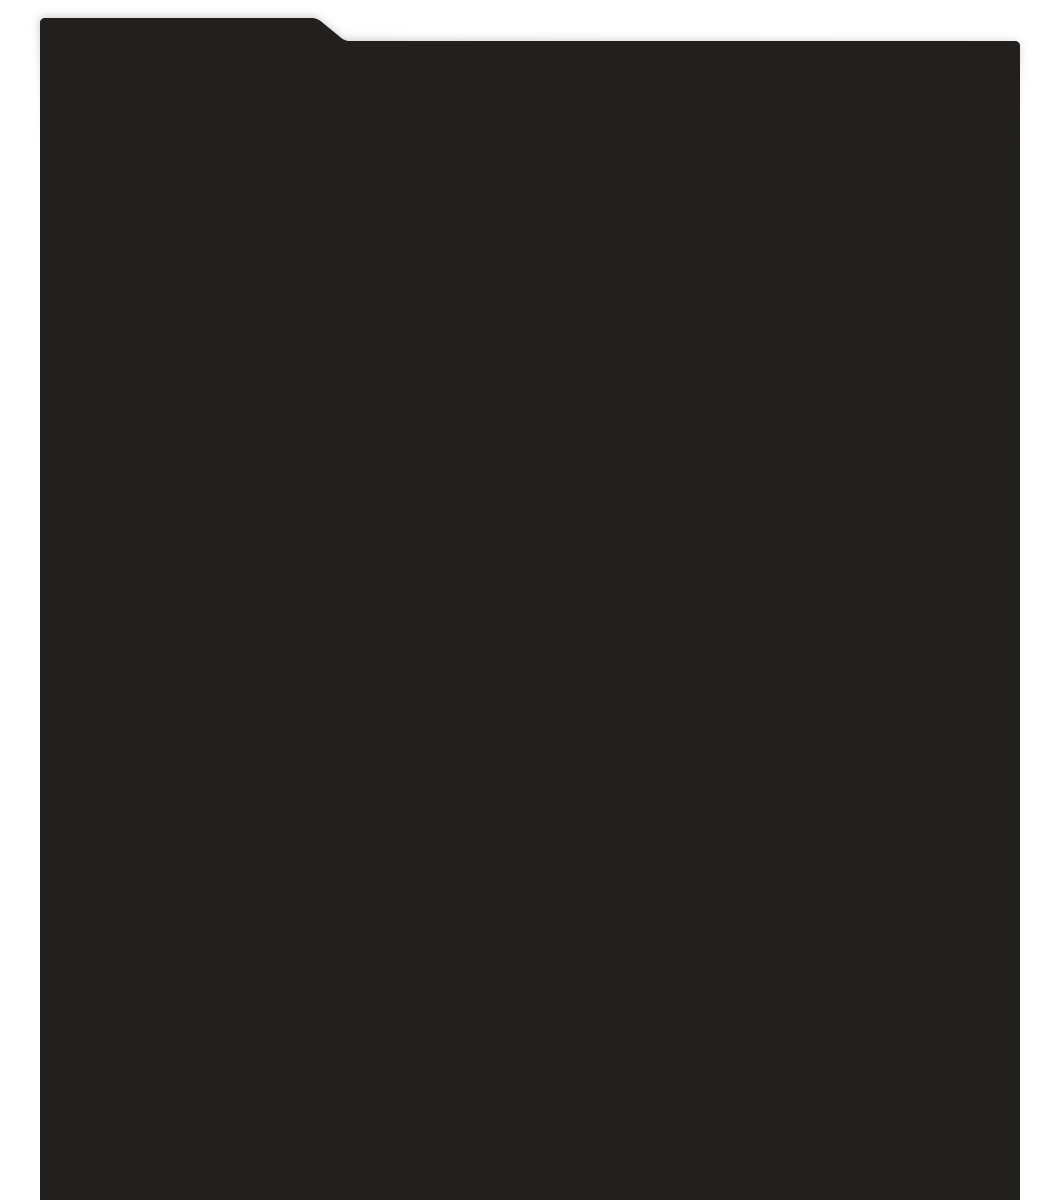
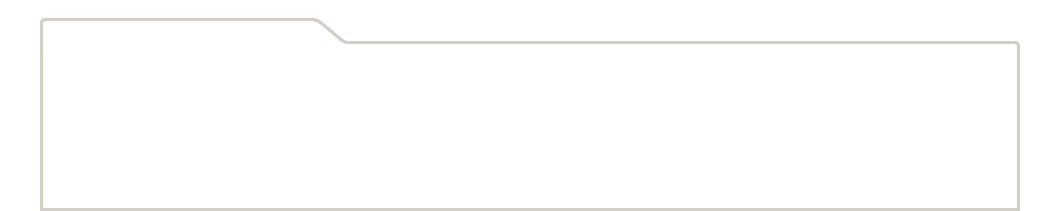
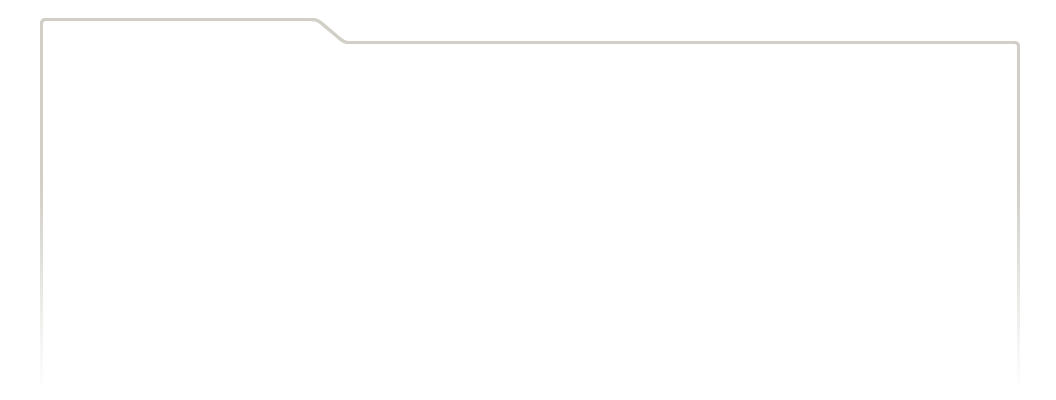
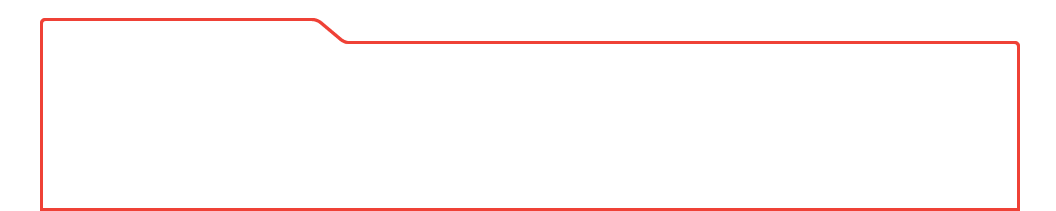
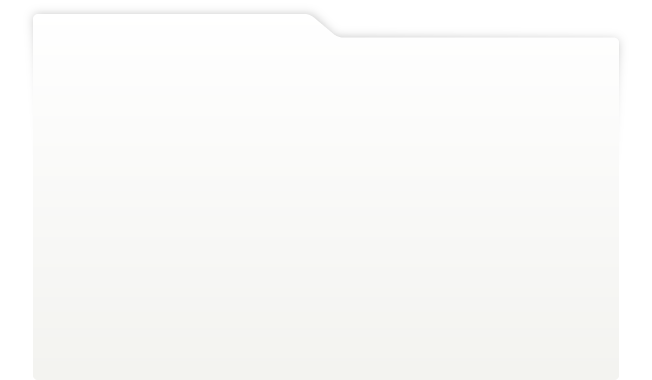
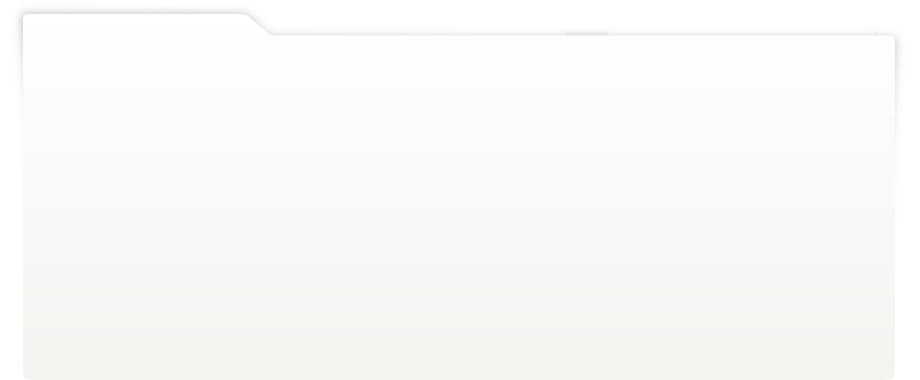
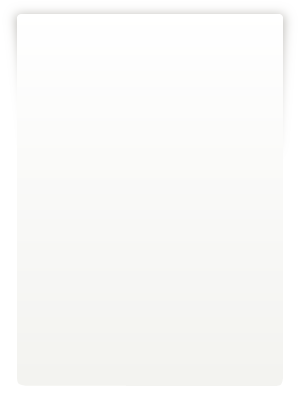
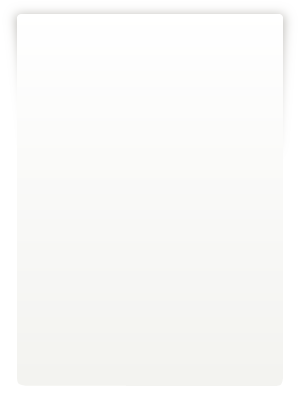
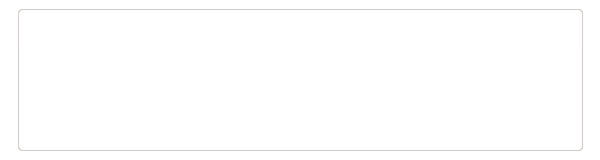
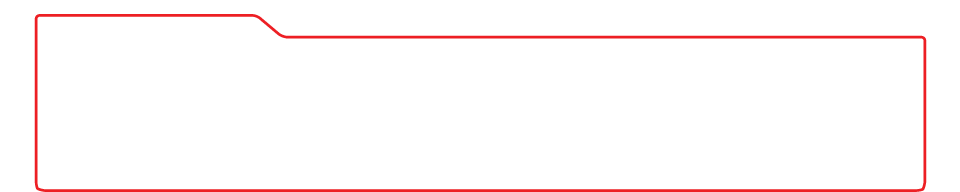
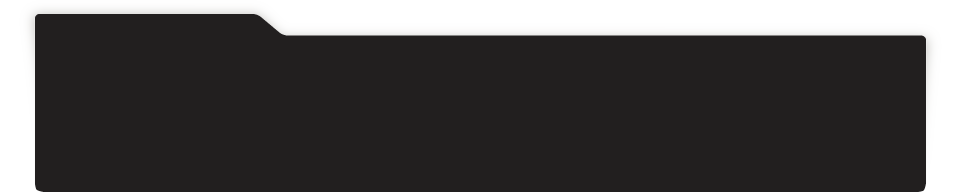
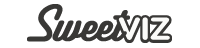
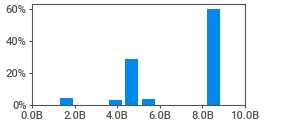
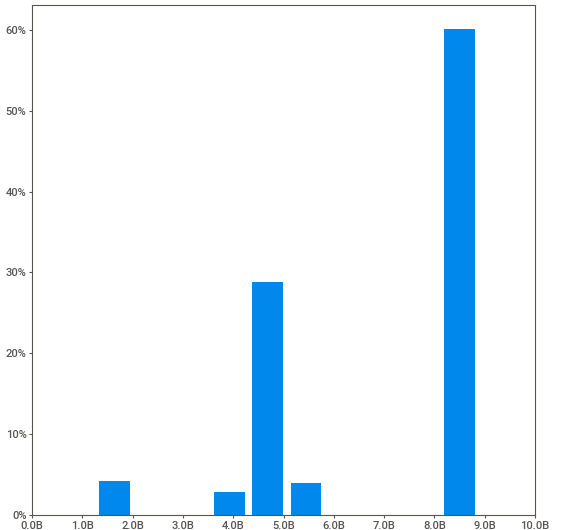
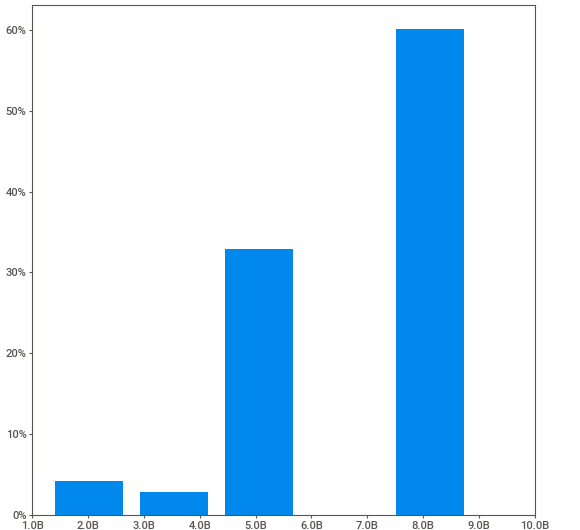
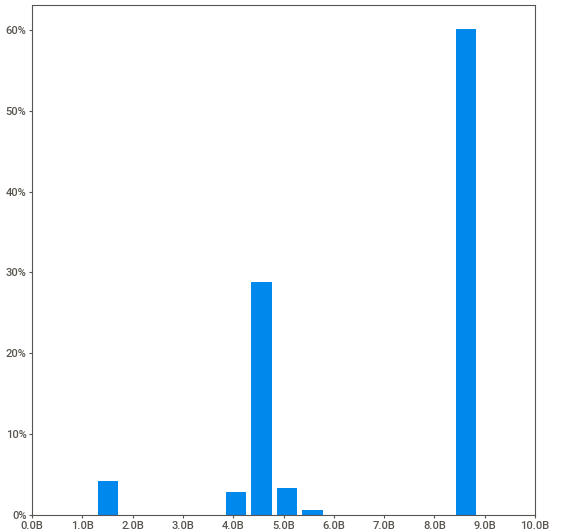
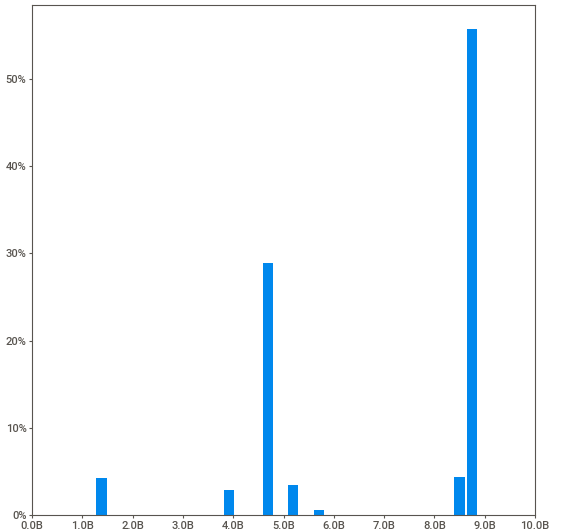
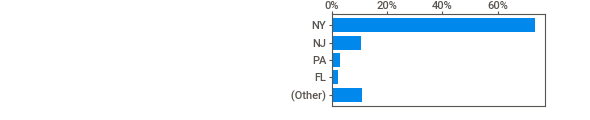
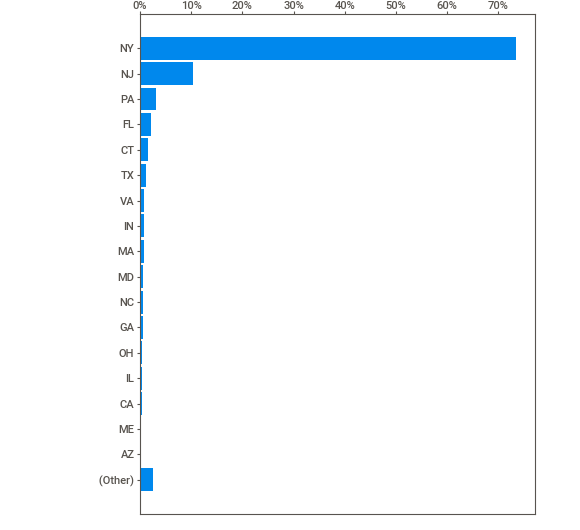
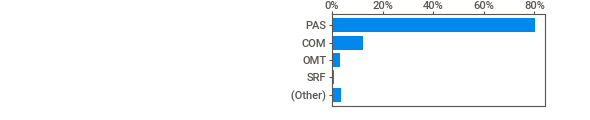
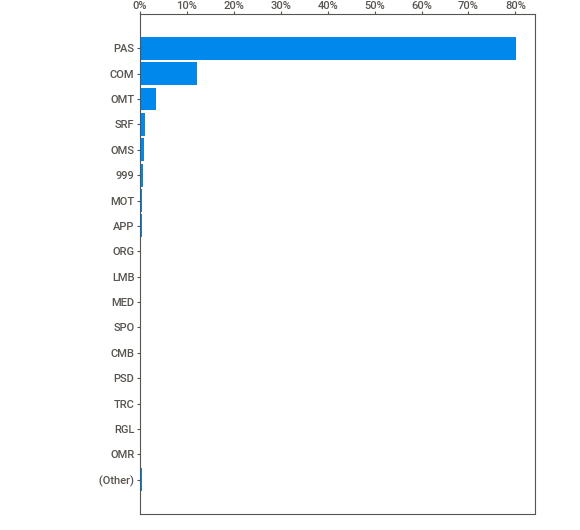
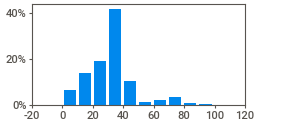
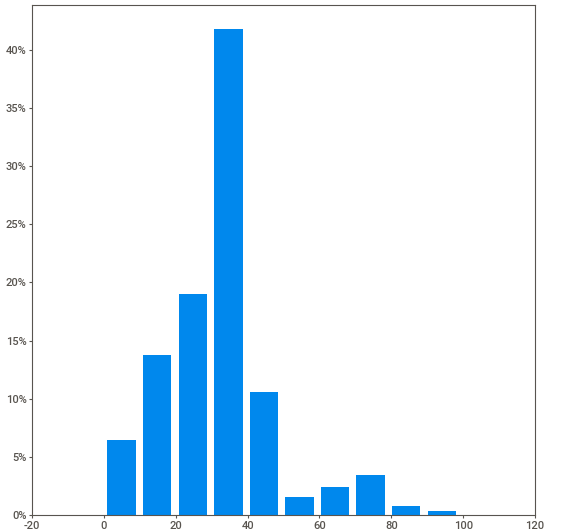
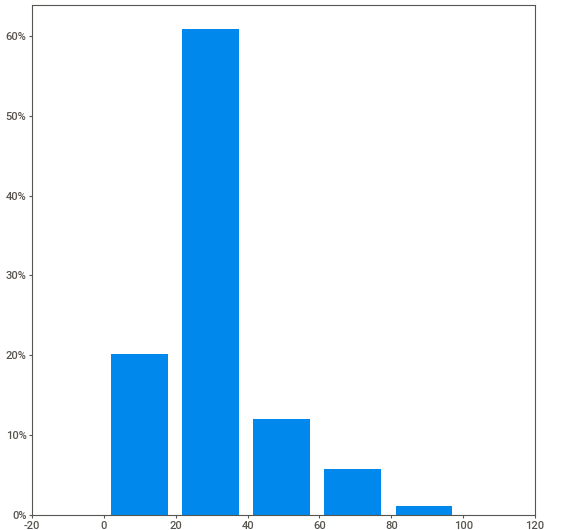
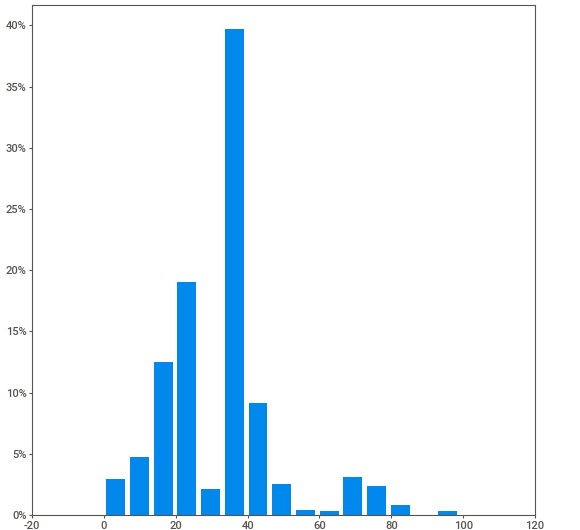
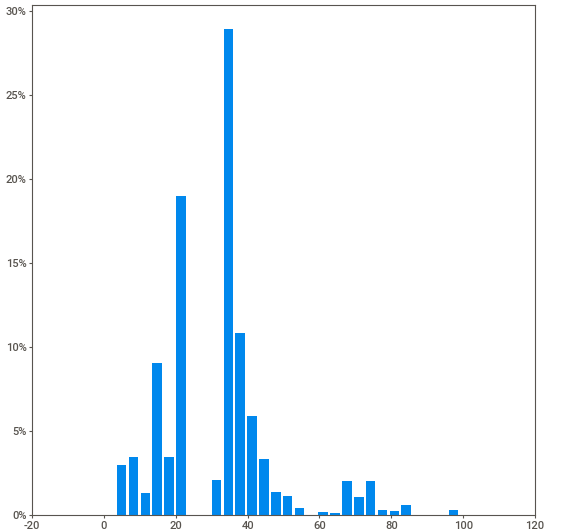
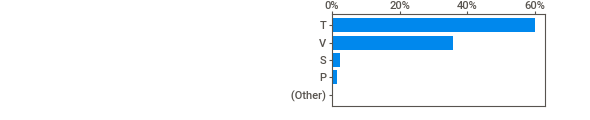
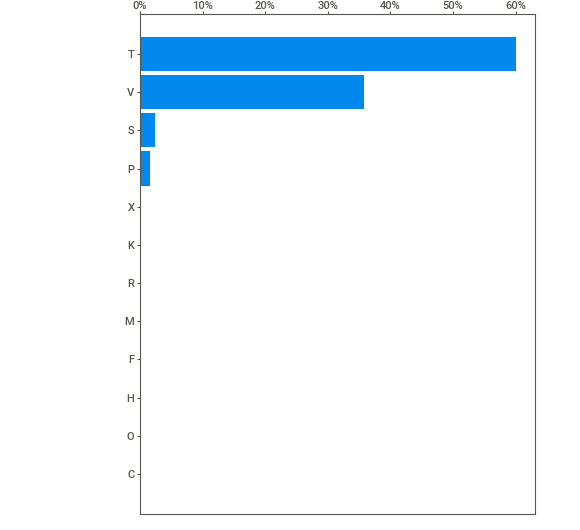
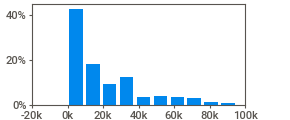
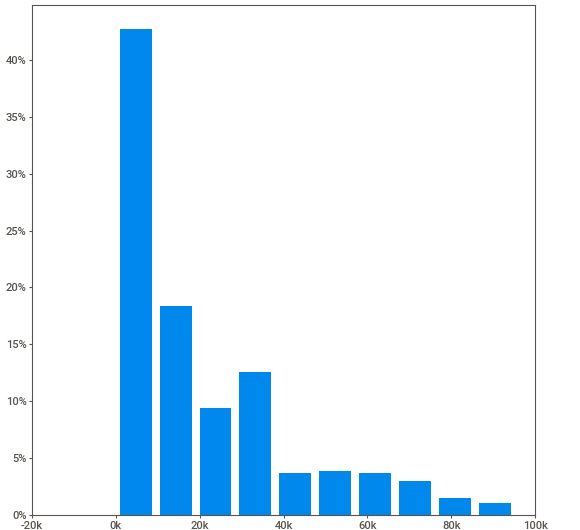
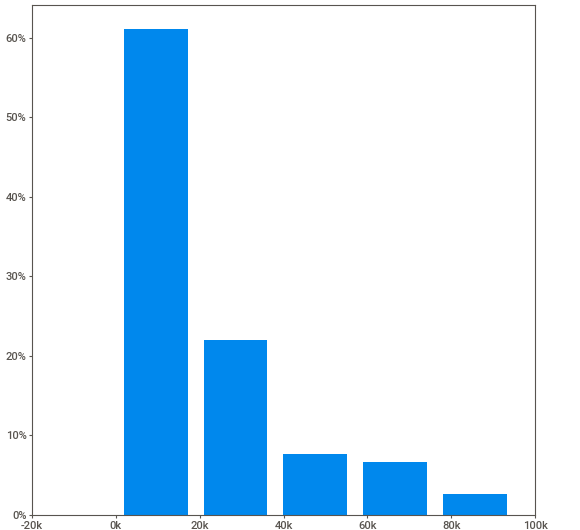
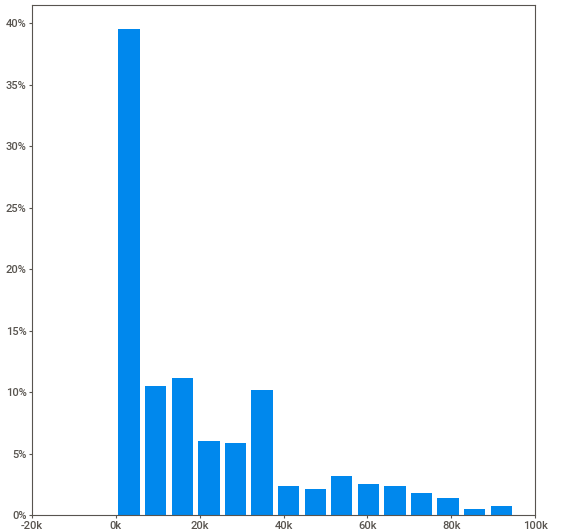
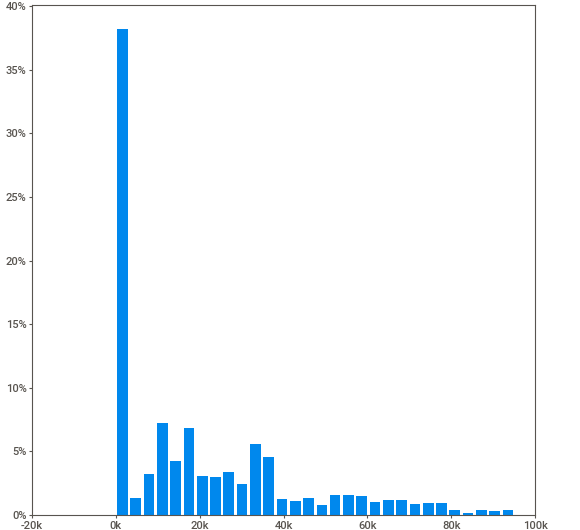
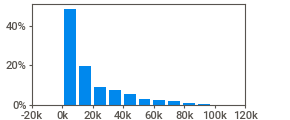
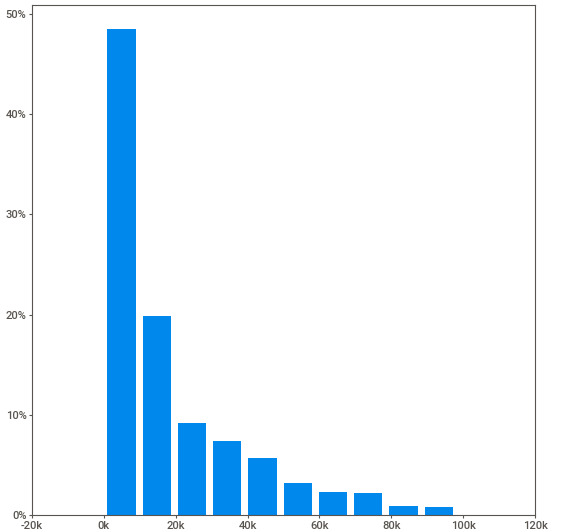
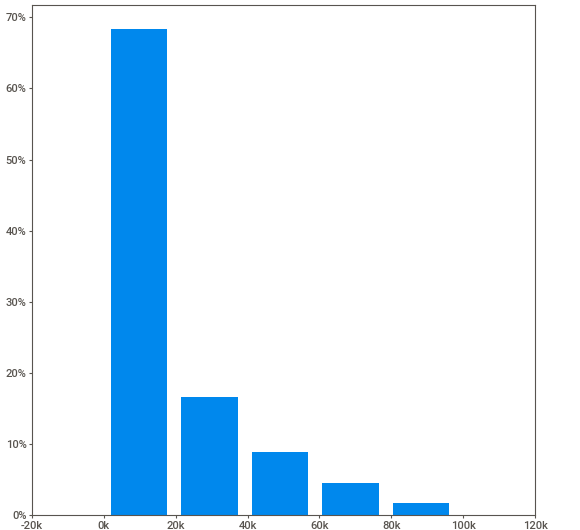
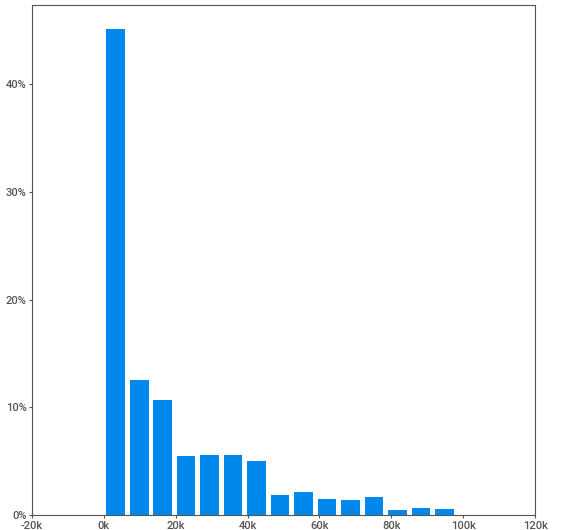
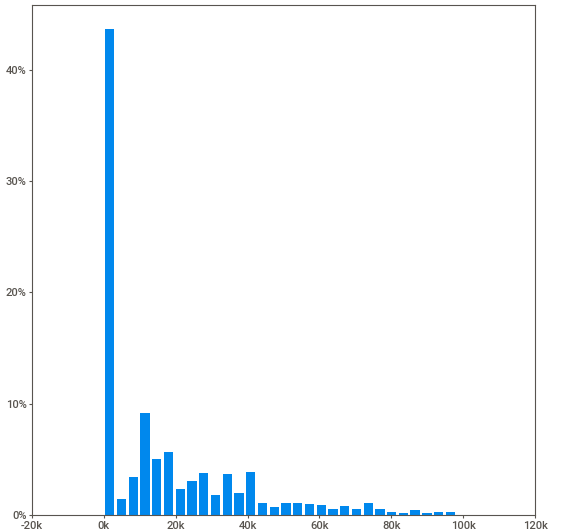
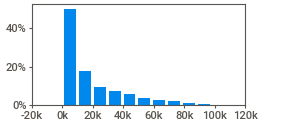
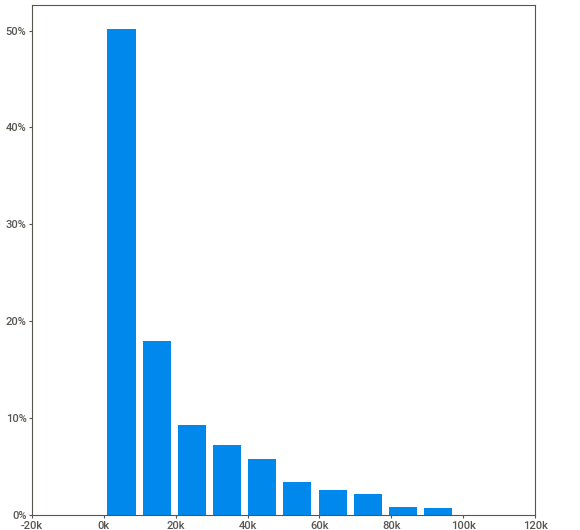
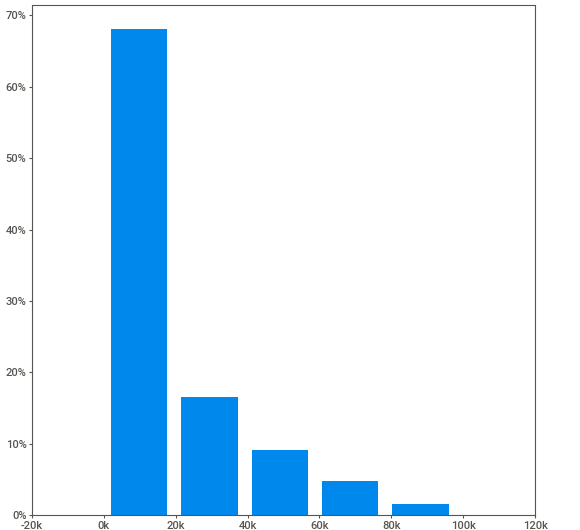
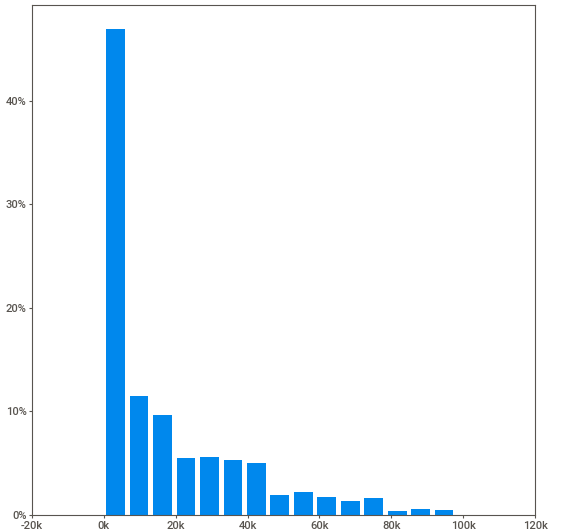
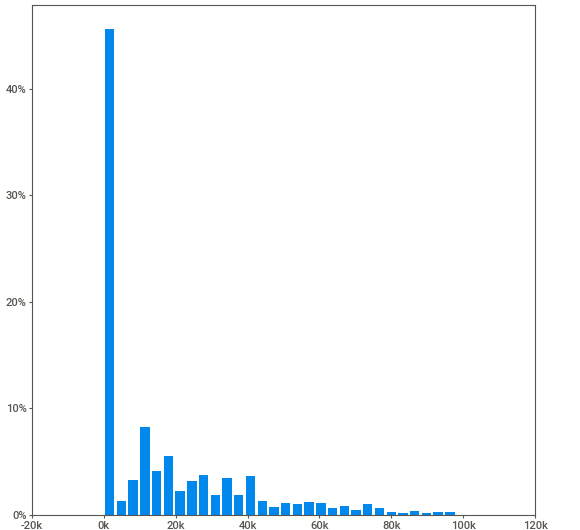
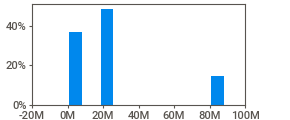
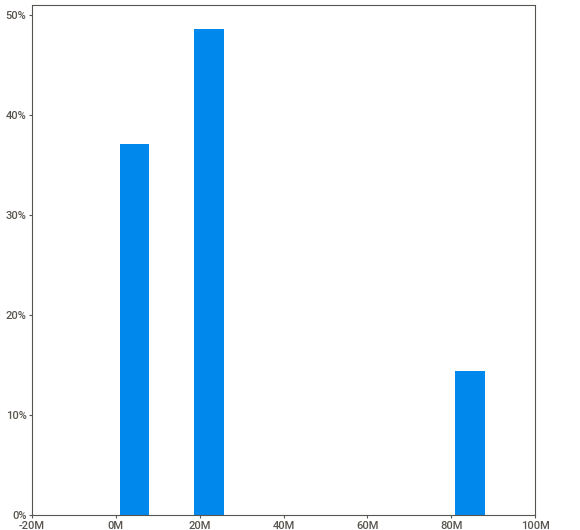
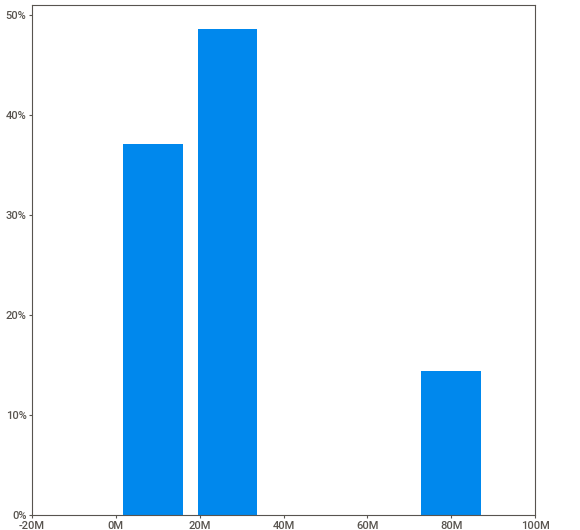
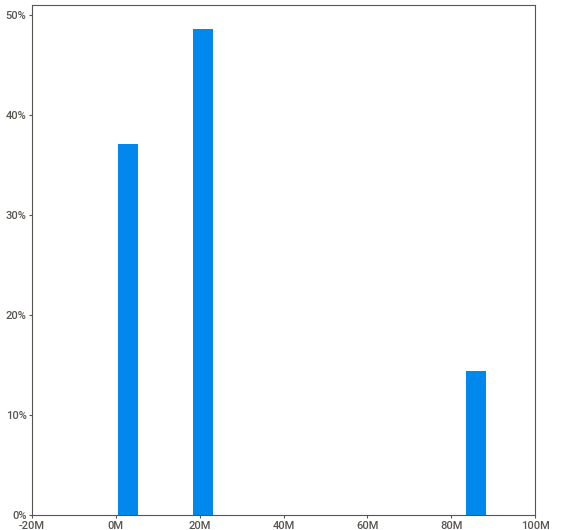
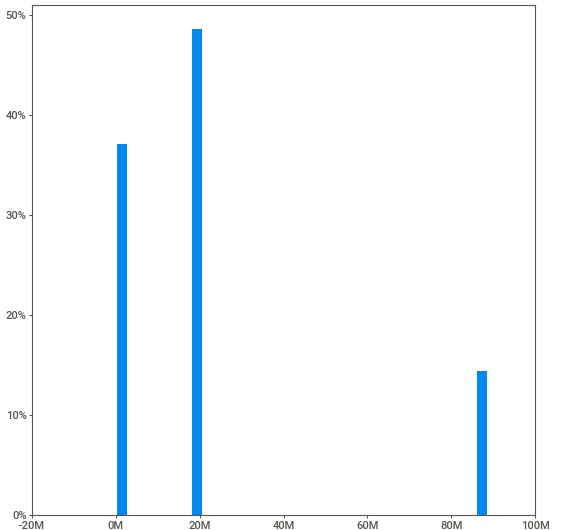
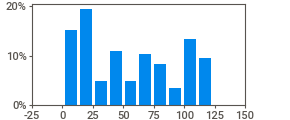
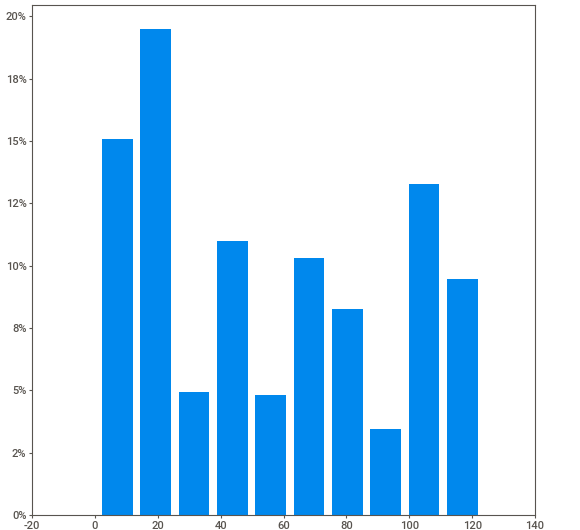
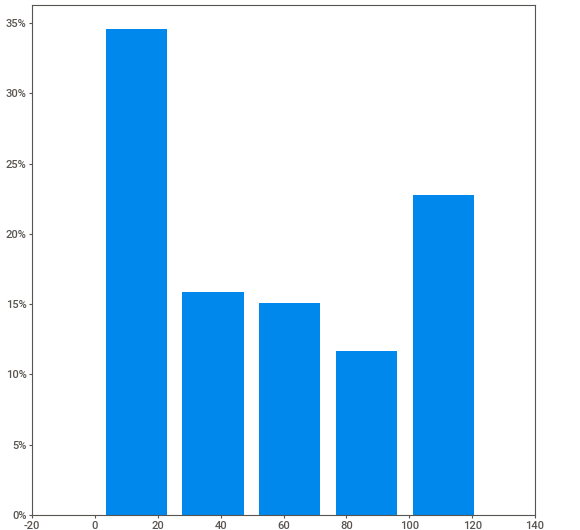
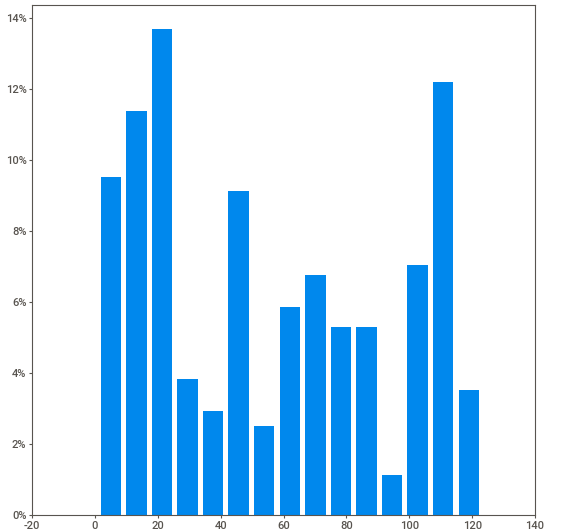
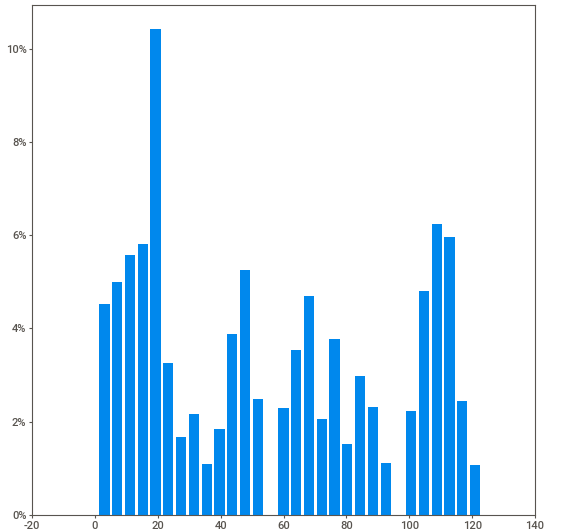
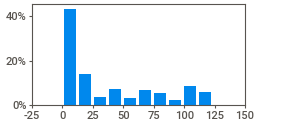
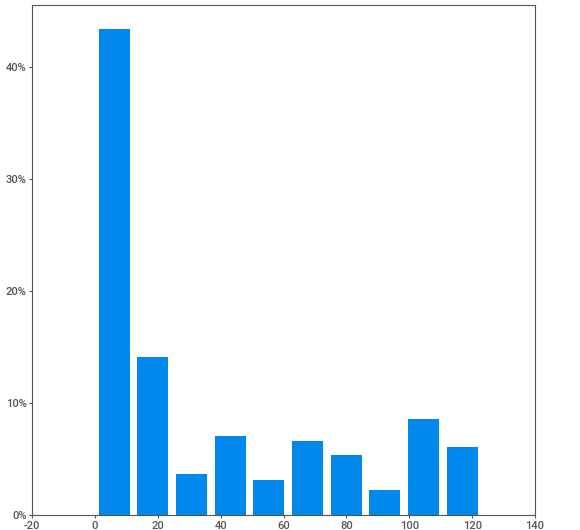
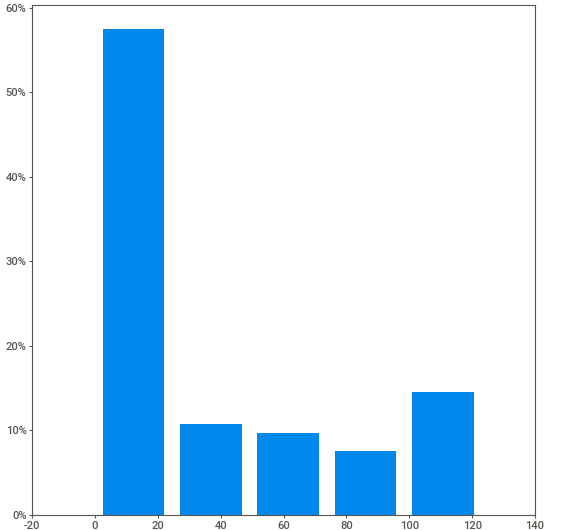
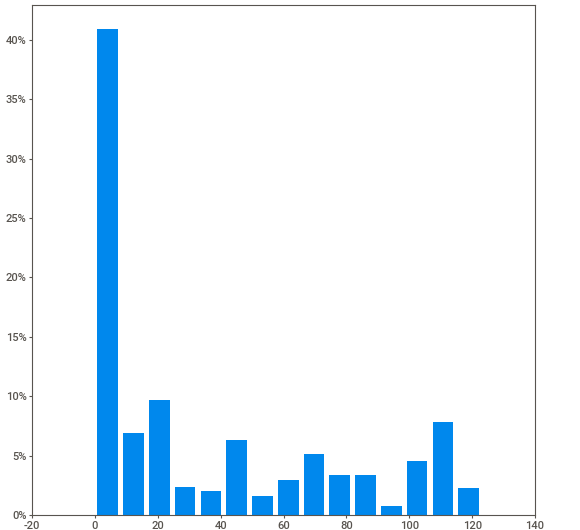
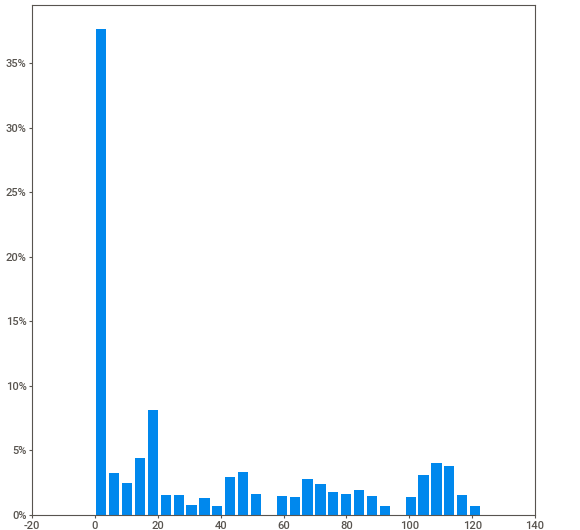
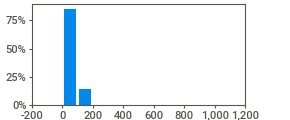
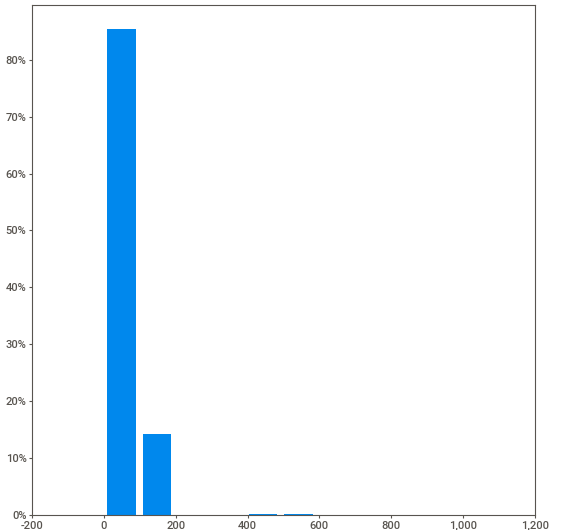
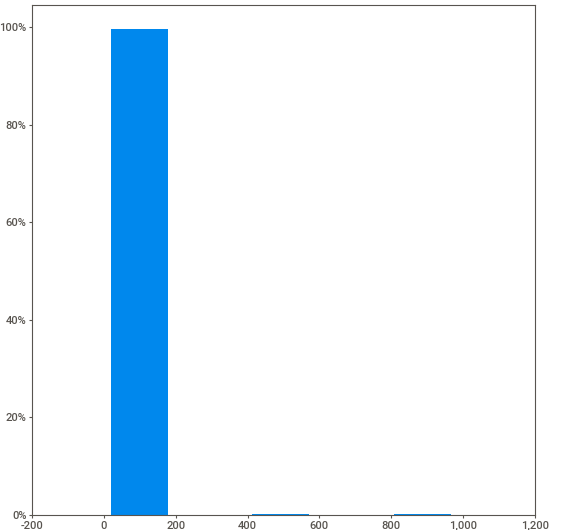
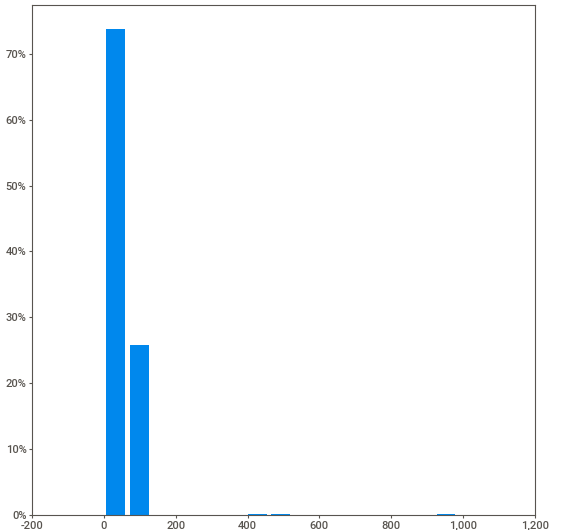
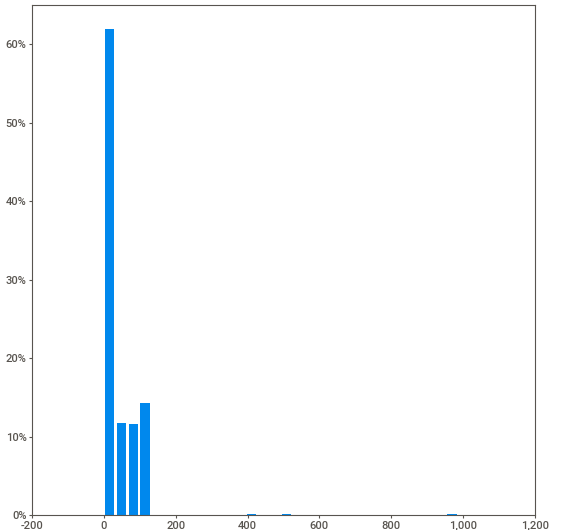
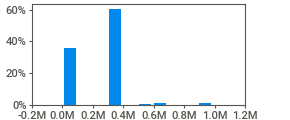
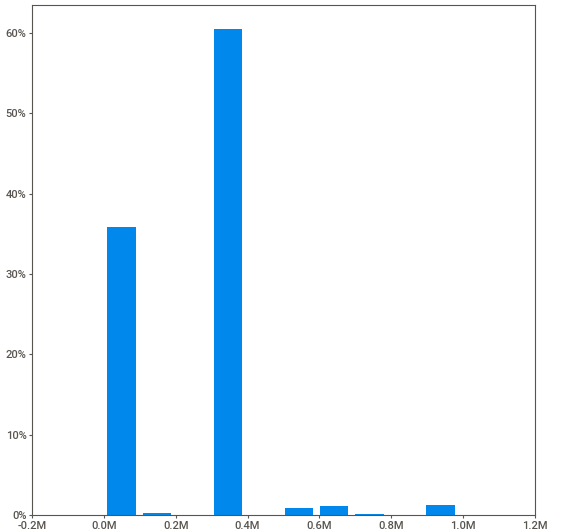
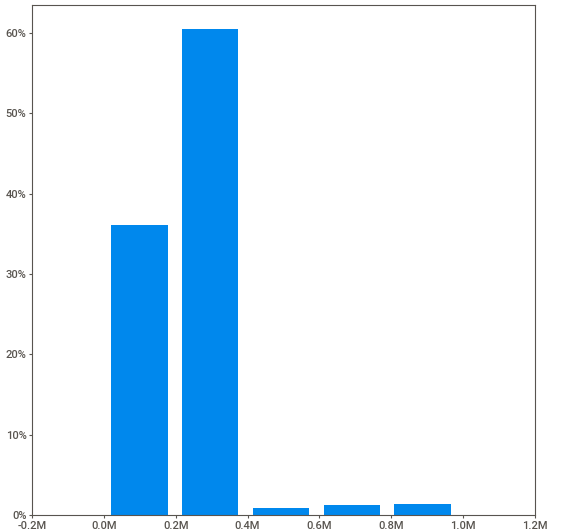
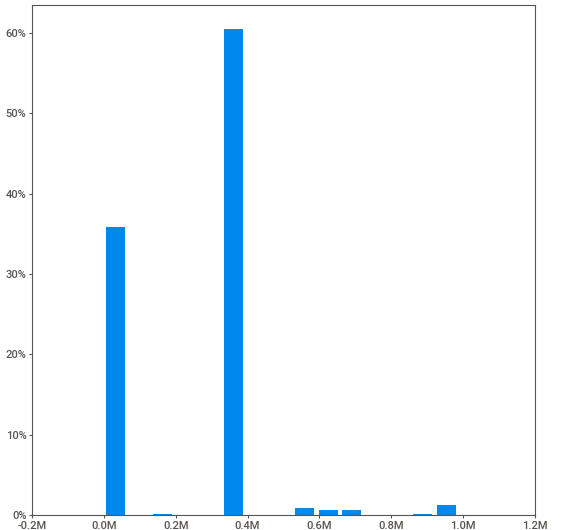
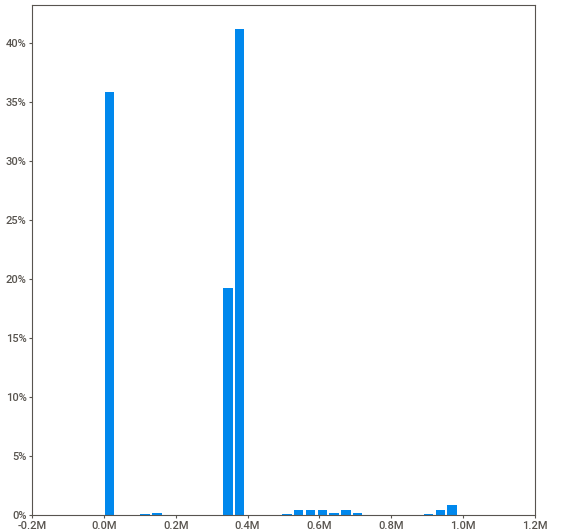
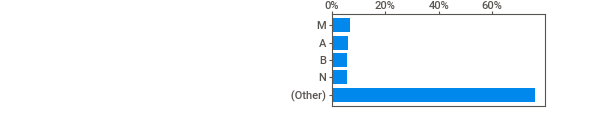
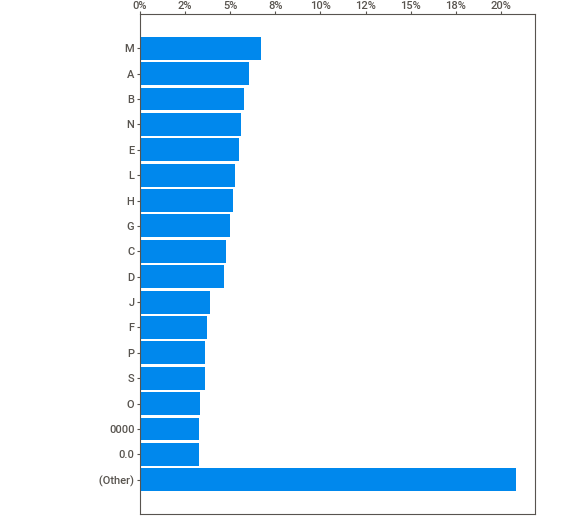
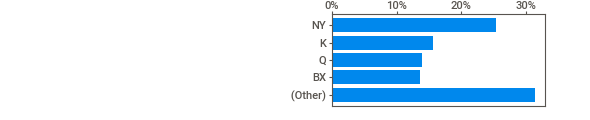
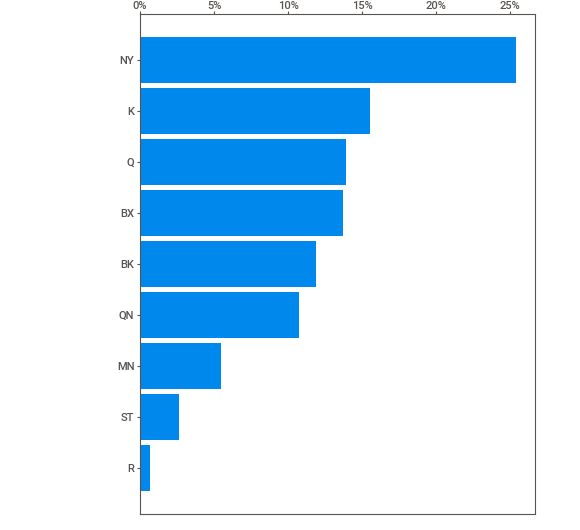
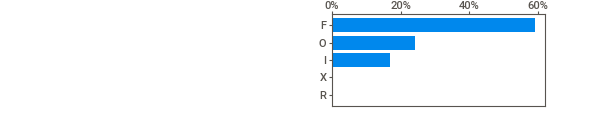
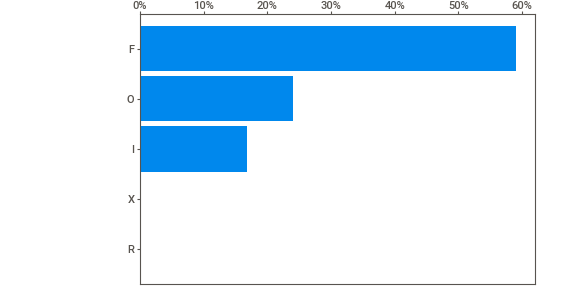
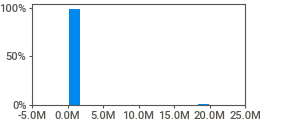
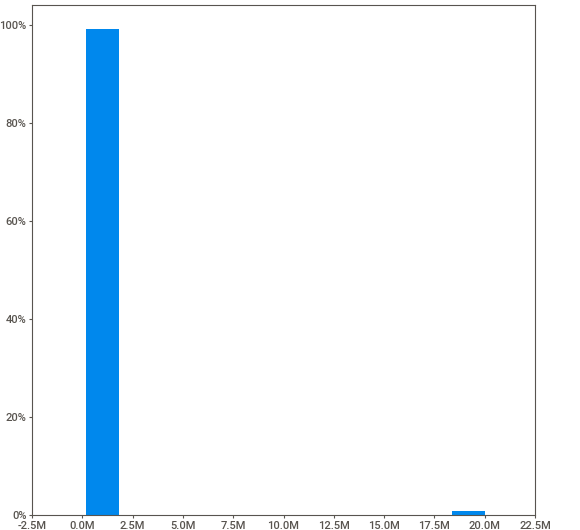
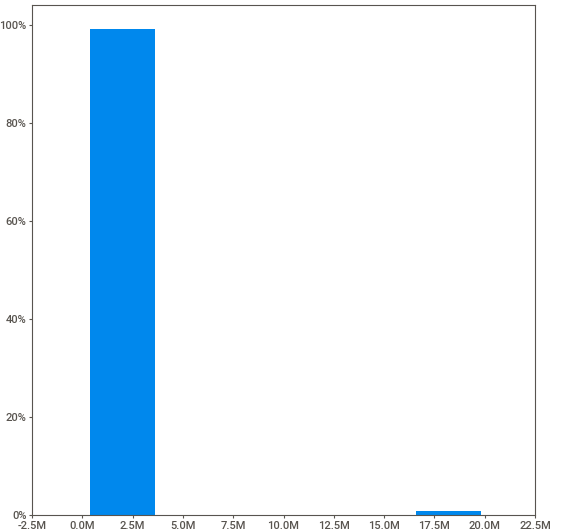
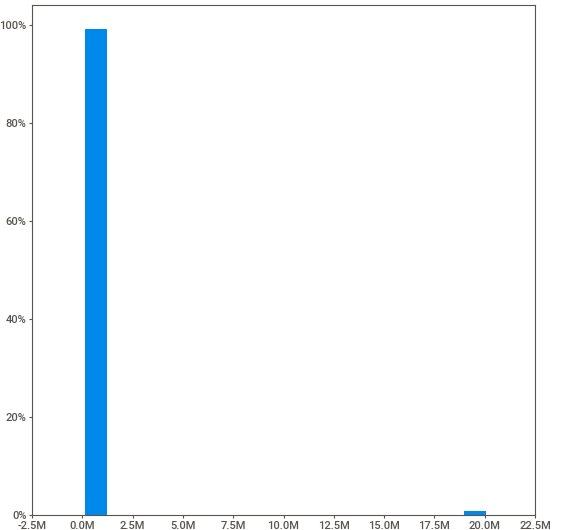
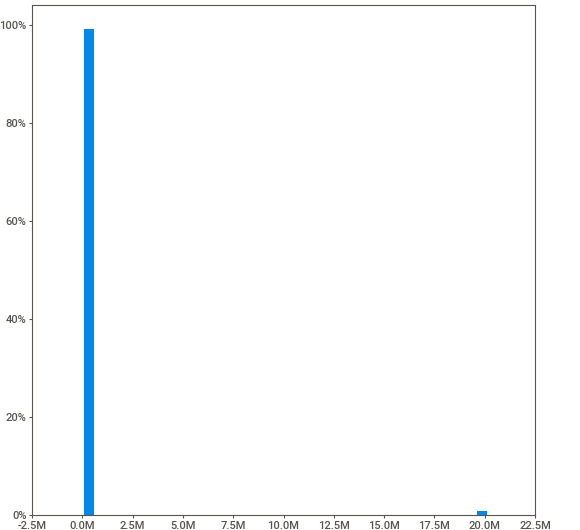
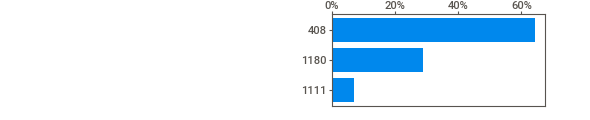
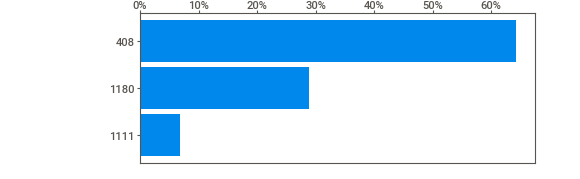
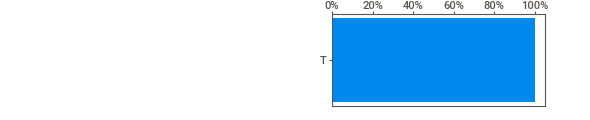
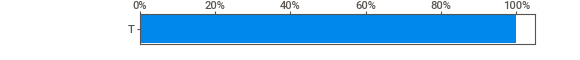
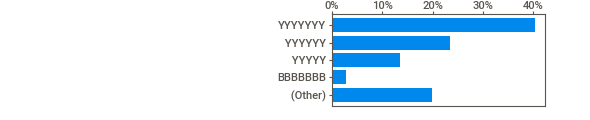
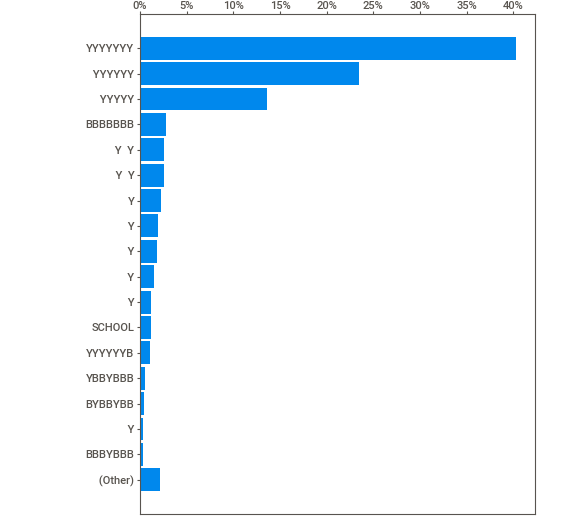
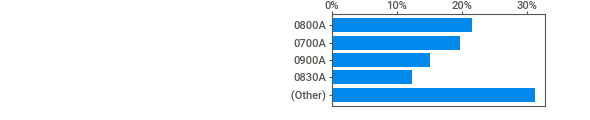
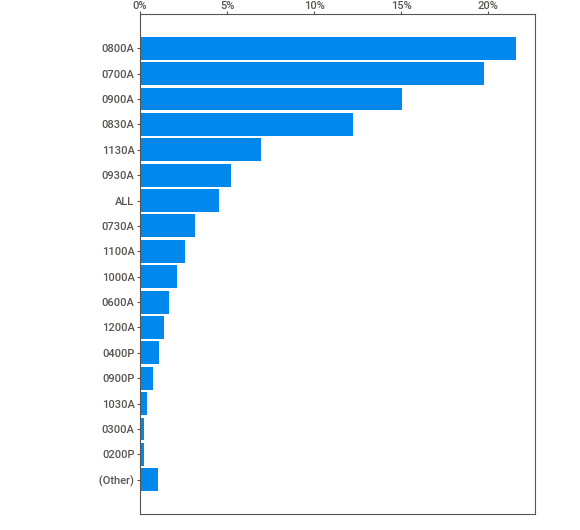
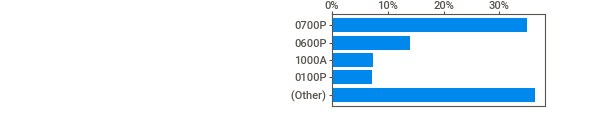
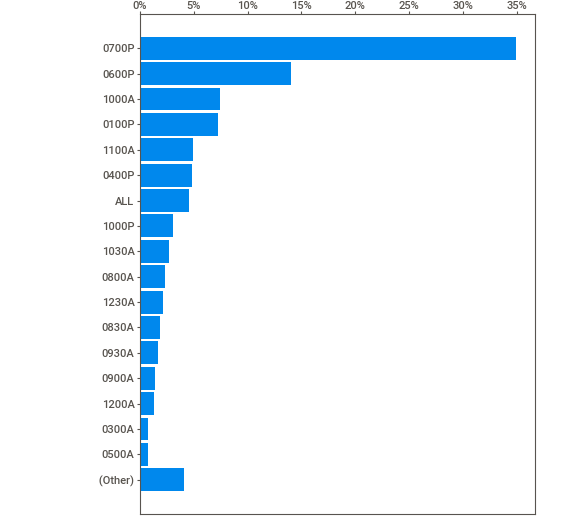
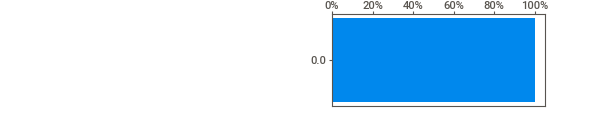
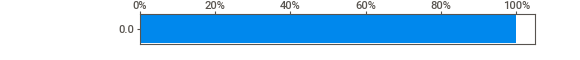
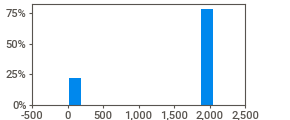
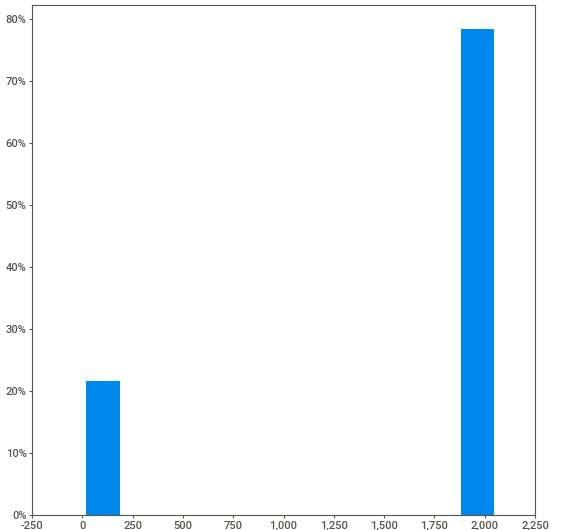
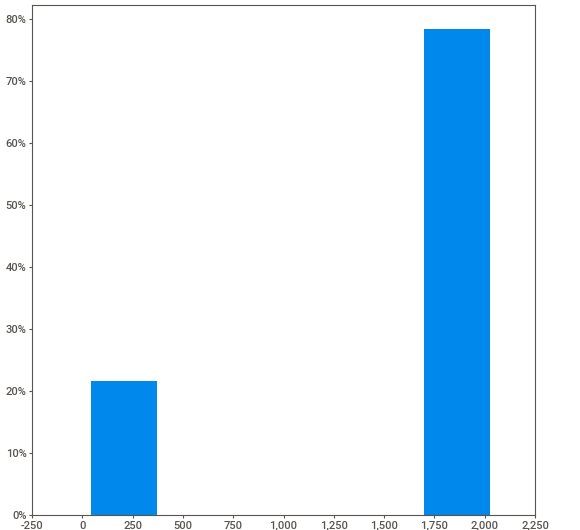
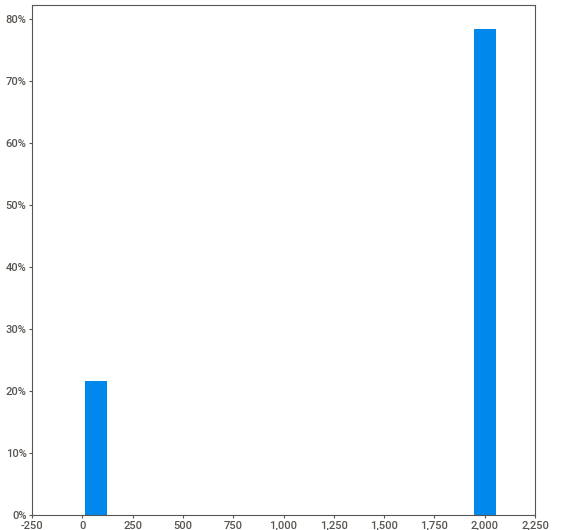
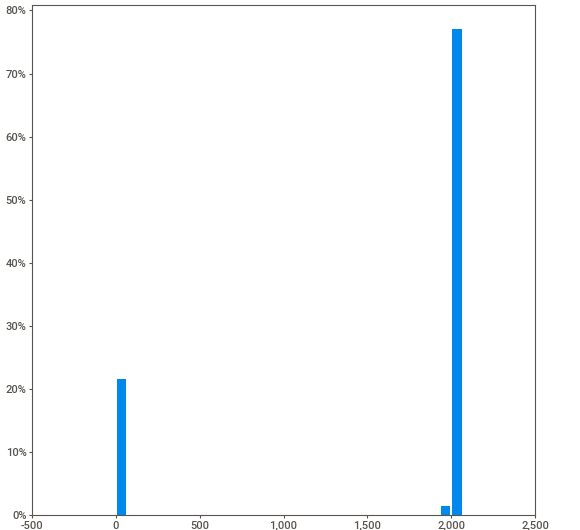
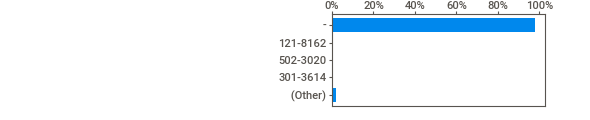
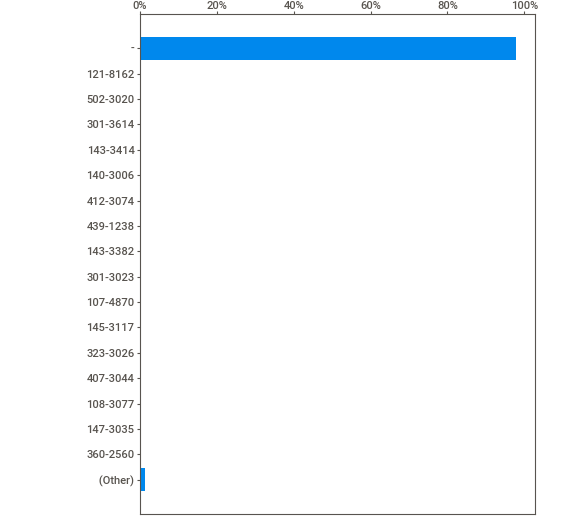
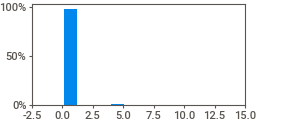
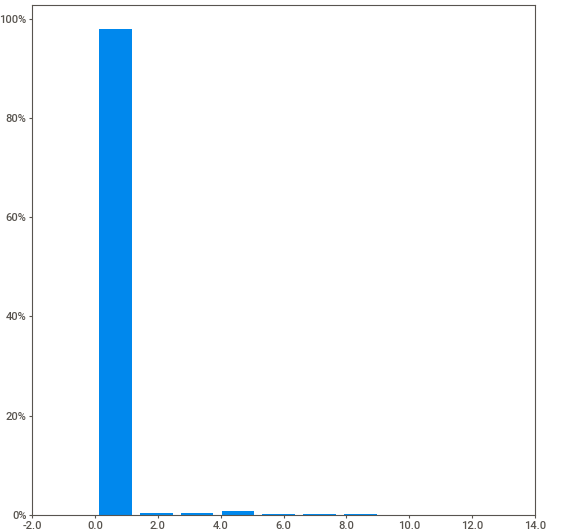
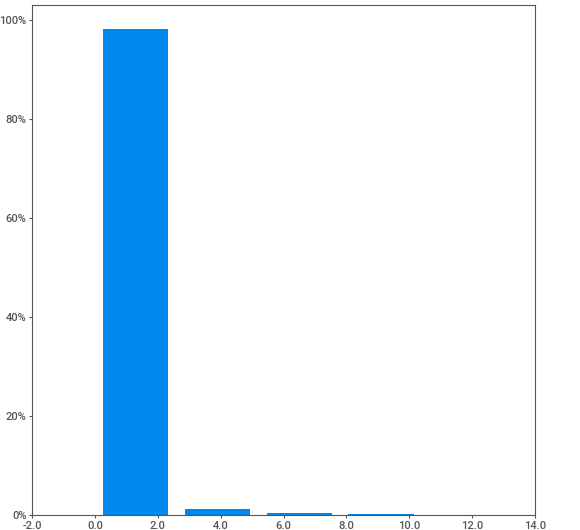
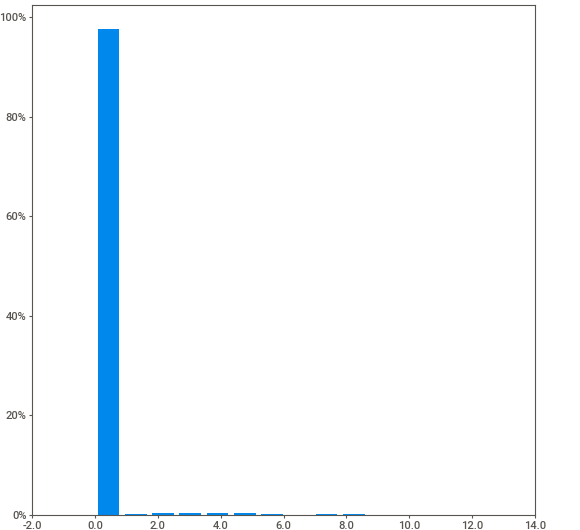
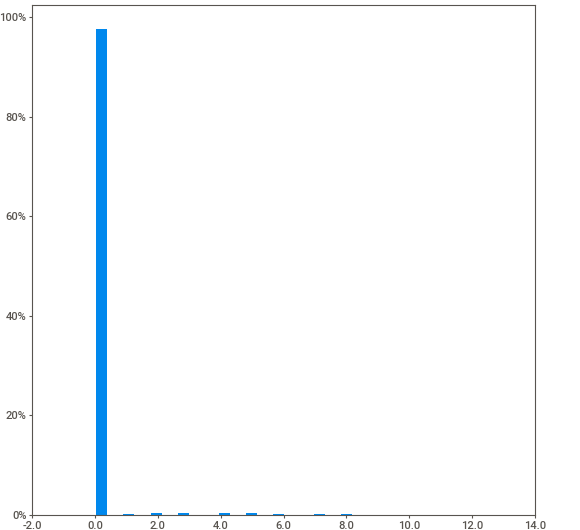
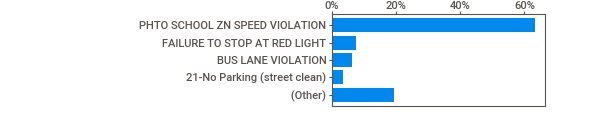
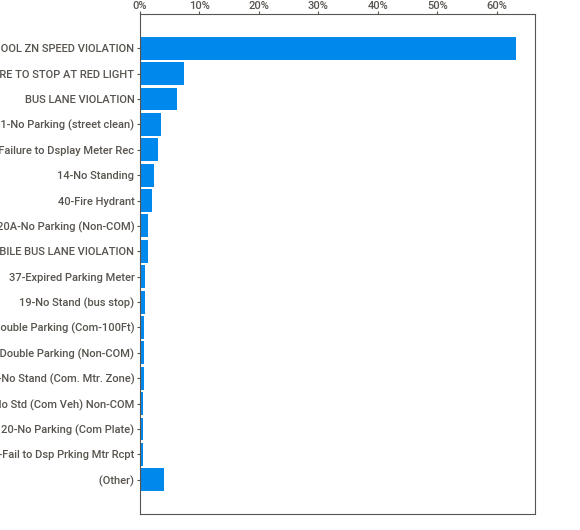
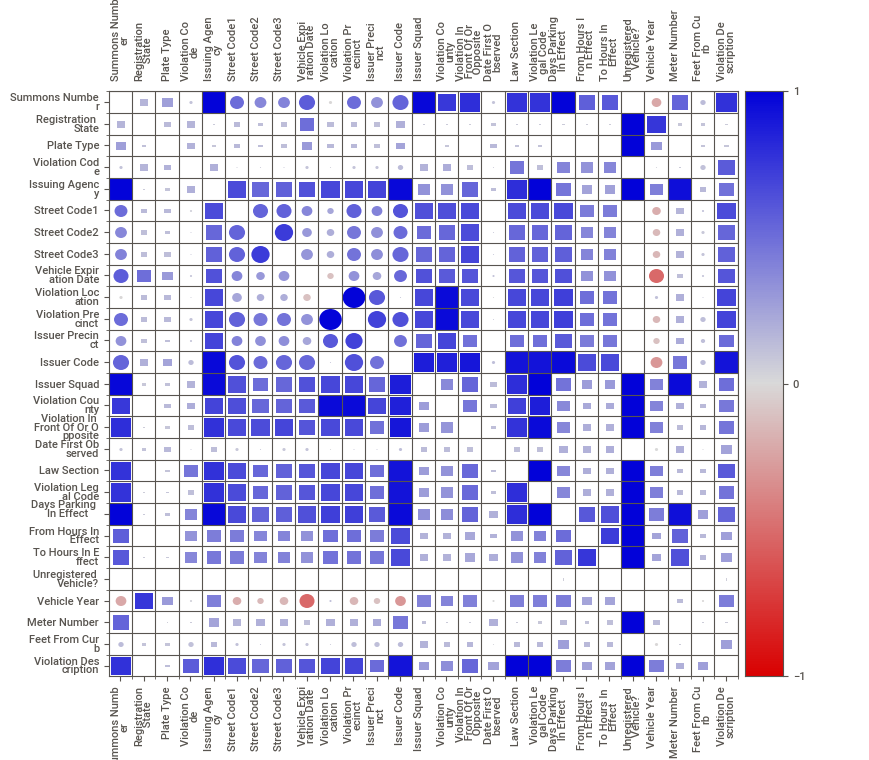
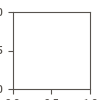

In [9]:
analyze_report.show_notebook(w="100%", h="full")

In [10]:
#Since the data has many missing values and invalid data we should remove all of the incorrect data for better analysis
# deleting columns with more than 80% null values
column_drop = ((df.isna().sum()/len(df))*100) > 80
df.drop(column_drop[column_drop.values == True].index.tolist(),axis=1,inplace=True)

# Converting Issued date to datetime format
df['Issue Date'] = pd.to_datetime(df['Issue Date'],format='%m/%d/%Y',errors='coerce')

# Replacing '99' in Registration State column by null
df['Registration State'] = df['Registration State'].replace({'99': None})

# Replacing '999' in PlateType column by null
df['Plate Type'] = df['Plate Type'].replace({'999': None})

# Converting incorrect values in Vehicle Expiration Date column to Null
incorrect_values = df[(df['Vehicle Expiration Date'] > 20990101)]['Vehicle Expiration Date'].unique().tolist()
df[df['Vehicle Expiration Date'].isin(incorrect_values)] = None

# Deleting duplicates in SummonsNumber column and making it unique
df.drop_duplicates(subset = ['Summons Number'], inplace = True)

# Replacing NAN values with 0 as the model cannot take categorical data
df['Date First Observed'] = df['Date First Observed'].replace({np.NaN:0}).astype('int') 
df['Date First Observed'] = df['Date First Observed'].replace({0:None})
df['Date First Observed'] = pd.to_datetime(df['Date First Observed'],format='%Y%m%d',errors='coerce')

# Drop duplicates based on 'SummonsNumber' column as summon numbers should be unique
df.drop_duplicates(subset = ['Summons Number'], inplace = True)

## FINDING PATTERNS IN DATA(DATA VIZUALIZATION)

<AxesSubplot: xlabel='Issuing Agency', ylabel='Summons Number'>

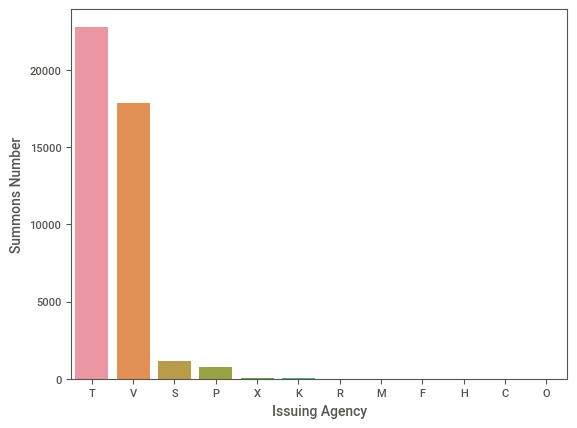

In [11]:
# Issuing agency vs Summons dataframe
is_plot = df.groupby(['Issuing Agency']).count()['Summons Number'].sort_values(ascending=False).reset_index()
sns.barplot(x = 'Issuing Agency', y = 'Summons Number', data = is_plot)

##### From the above visualization it is inferred that Issuing Agency **T** has the maximum Summons Number

In [12]:
# vehicle registration state vs Summons
df.groupby(['Registration State']).count()['Summons Number'].sort_values(ascending=False).reset_index().head(10)

,Registration State,Summons Number
0,NY,34505
1,NJ,1919
2,PA,1112
3,FL,1016
4,CT,473
5,TX,468
6,VA,379
7,MA,314
8,MD,285
9,NC,276


##### It is inferred from the above table that ***New York*** city has the maximum Summons number followed by ***New Jersey***

In [13]:
# Plate Type (Top 10) vs Summons
df.groupby(['Plate Type']).count()['Summons Number'].sort_values(ascending=False).reset_index().head(10)

,Plate Type,Summons Number
0,PAS,34932
1,COM,4167
2,OMT,1661
3,SRF,480
4,OMS,416
5,MOT,182
6,APP,167
7,ORG,105
8,LMB,93
9,MED,57


##### The vehicle plate type with the highest number of summons was PAS

In [14]:
# Plate ID (Top 5) vs Summons
df.groupby(['Plate ID']).count()['Summons Number'].sort_values(ascending=False).reset_index().head(5)

,Plate ID,Summons Number
0,BLANKPLATE,13
1,82547PC,7
2,77372PC,5
3,94023,5
4,71617MM,5


##### Amongst the different registered vehicle plate IDs, the maximum number of summon tickets were issued to blank plates

<AxesSubplot: xlabel='Summons Number', ylabel='Violation Description'>

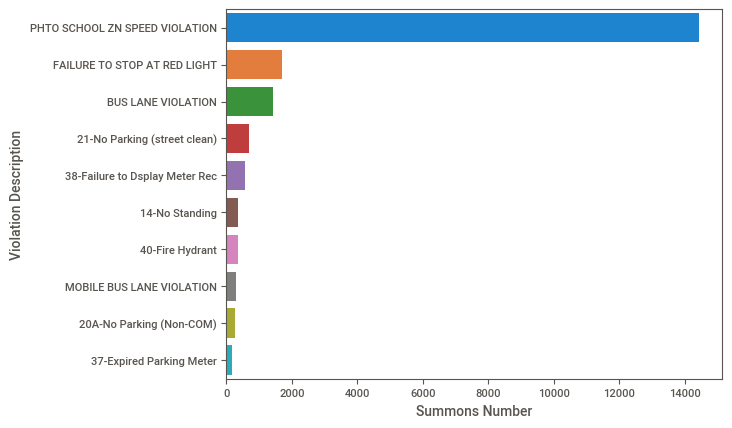

In [15]:
# Top 10 Violations dataframe
top_10_violations = df.loc[:,['Violation Description','Summons Number']].groupby(['Violation Description']).count()['Summons Number'].reset_index().sort_values('Summons Number',ascending = False).head(10)
# Bar plot
sns.barplot(x = 'Summons Number', y = 'Violation Description', data = top_10_violations)

#### The maximum number of tickets were issued for overspeeding near school premises violation

In [16]:
# Violation Time (Top 10) vs Summons
df.groupby(['Violation Time']).count()['Summons Number'].sort_values(ascending=False).reset_index().head(10)

,Violation Time,Summons Number
0,0836A,121
1,0839A,108
2,0940A,108
3,1136A,106
4,0806A,99
5,0939A,93
6,0807A,93
7,0838A,93
8,1144A,93
9,0810A,92


#### From the above table, it is quite evident that the maximum number of violations occured between 8 AM to 12 PM

<AxesSubplot: xlabel='Violation County', ylabel='Summons Number'>

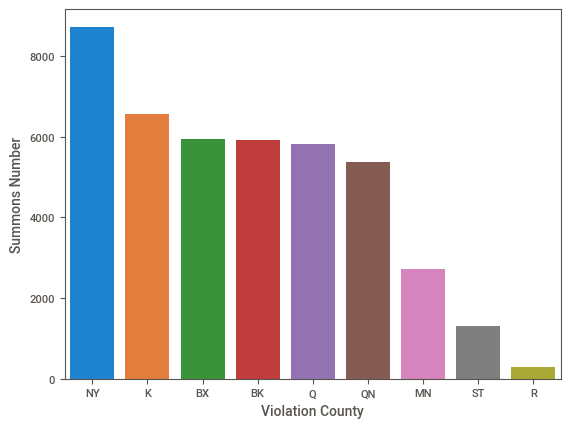

In [17]:
# Vehicle County vs Summons
vc_plot = df.groupby(['Violation County']).count()['Summons Number'].sort_values(ascending=False).reset_index()
sns.barplot(x = 'Violation County', y = 'Summons Number', data = vc_plot)

##### The maximum number of violations occured in the county of New York

In [18]:
df[df['Registration State'] != 'NY'].groupby('Violation Code')['Summons Number'].count().nlargest(5).reset_index(name='Count')

,Violation Code,Count
0,36.0,2798
1,21.0,1103
2,14.0,567
3,40.0,565
4,20.0,469


##### The above table shows the top 5 most common violation code and the violation code 36 is the most occured


In [19]:
# Vehicle Body Type (Top 10) vs Summons
df.groupby(['Vehicle Body Type']).count()['Summons Number'].sort_values(ascending=False).reset_index().head(10)

,Vehicle Body Type,Summons Number
0,SUBN,17907
1,4DSD,12371
2,VAN,3266
3,PICK,1279
4,SDN,1083
5,2DSD,952
6,DELV,948
7,UT,805
8,SD,513
9,4D,313


##### SUBN vehicle body type accounted for the maximum number of violations

In [20]:
df.groupby(['Vehicle Make', 'Street Name']).count()['Summons Number'].sort_values(ascending=False).reset_index().head(10)

,Vehicle Make,Street Name,Summons Number
0,FORD,Broadway,77
1,FORD,5th Ave,51
2,FORD,3rd Ave,50
3,TOYOT,Broadway,43
4,HONDA,Broadway,40
5,TOYOT,WB CONDUIT BLVD @ LI,40
6,TOYOT,EB W 14TH STREET @ 5,40
7,NISSA,Broadway,38
8,FORD,2nd Ave,38
9,FORD,Lexington Ave,36


##### Broadway summons were the highest with FORD being mostly involved in broadway summons

In [21]:
# Vehicle Make (Top 10) vs Summons
df.groupby(['Vehicle Make']).count()['Summons Number'].sort_values(ascending=False).reset_index().head(10)

,Vehicle Make,Summons Number
0,HONDA,5076
1,TOYOT,4994
2,FORD,4281
3,NISSA,4105
4,CHEVR,2281
5,ME/BE,2039
6,BMW,2032
7,JEEP,2012
8,DODGE,1682
9,HYUND,1303


##### The highest number of tickets were issued to Honda vehicles

In [22]:
# Vehicle Make + Body Type (Top 5) vs Summons
df.groupby(['Vehicle Make','Vehicle Body Type']).count()['Summons Number'].sort_values(ascending=False).reset_index().head(5)

,Vehicle Make,Vehicle Body Type,Summons Number
0,HONDA,SUBN,2155
1,TOYOT,SUBN,2130
2,HONDA,4DSD,2116
3,TOYOT,4DSD,2063
4,JEEP,SUBN,1810


##### Honda vehicles of body type SUBN accounted for the maximum number of summons

In [23]:
# Vehicle Location vs Summons
df.groupby(['Violation Location']).count()['Summons Number'].sort_values(ascending=False).reset_index().head(10)

,Violation Location,Summons Number
0,19.0,1120
1,114.0,936
2,18.0,805
3,14.0,726
4,13.0,684
5,115.0,640
6,109.0,633
7,1.0,626
8,84.0,554
9,6.0,509


##### The general violation location number 19 was issued the maximum number of tickets

In [24]:
# Registration State, Violation Description & Summons Number
df.loc[:,['Registration State','Violation Description','Summons Number']].groupby(['Registration State',
'Violation Description']).count()['Summons Number'].reset_index().sort_values('Summons Number',ascending = False).head(5)

,Registration State,Violation Description,Summons Number
307,NY,PHTO SCHOOL ZN SPEED VIOLATION,11624
304,NY,FAILURE TO STOP AT RED LIGHT,1339
303,NY,BUS LANE VIOLATION,1068
236,NJ,PHTO SCHOOL ZN SPEED VIOLATION,1032
254,NY,21-No Parking (street clean),564


##### The maximum number of tickets were issued for overspeeding near school premises violation with vehicles registered in NY

In [25]:
print(df[df['Plate Type'] == 'PAS'].groupby('Vehicle Color')['Summons Number'].count().nlargest(1).reset_index(name='Count'))
print(df[df['Plate Type'] == 'COM'].groupby('Vehicle Color')['Summons Number'].count().nlargest(1).reset_index(name='Count'))

  Vehicle Color  Count
0            GY   7970
  Vehicle Color  Count
0            WH   2947


##### It is inferred that the passenger vehicles are prone to most violations compared to commercial vehicles 

C:\Users\evans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


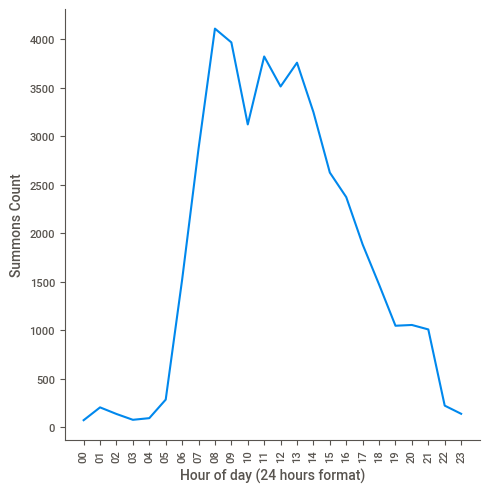

In [26]:
# Time series plot (ViolationTime vs Summons)

# Concatenate 'M' to 'ViolationTime' column 
df['Violation Time'] = df['Violation Time'] + 'M'
# Convert the column to datetime
df['Violation Time'] = pd.to_datetime(df['Violation Time'],format='%I%M%p',errors='coerce')
# Extract hour from the 'ViolationTime' column 
df['Violation Time'] = df['Violation Time'].dt.strftime('%H')
# Prepare dataframe for time series plot
time_series_summons = df.groupby(['Violation Time']).count()['Summons Number'].reset_index().sort_values(['Violation Time'])

# Time series plot using seaborn
sns.relplot(x = "Violation Time", y = "Summons Number", data = time_series_summons, kind = "line", ci = None)
plt.xlabel("Hour of day (24 hours format)")
plt.xticks(rotation = 90)
plt.ylabel("Summons Count")
plt.show()

##### From the above line plot, we can see that the peak for the maximum number of summons in a day occured around 8 AM